<a href="https://colab.research.google.com/github/PaleoLipidRR/plotting-with-python-intro/blob/main/PWP_02_Intro_to_Pandas_and_color_by_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Python Visualization (version 1.0)**
Notebook #2: Intro to pandas and colorby group using groupby()

By Ronnakrit "Ronnie" Rattanasriampaipong  
Graduate student, Department of Oceanography, TAMU

Created date: 11/12/2021  
Last update: 11/12/2021

---


**This document is created to introduce how to plot data using python. This document will not cover basic elements for python 3 programming languages.**

Generally,the `matplotlib` is the most popular python library that people use to plot graphs, charts, and so on. Here, I will use `ProPlot`" as a wrapper package of the matplotlib for plotting subplots with less repetitive and more readable codes. More information about ProPlot can be found here: https://proplot.readthedocs.io/en/v0.2.3/index.html

In this document, I will not cover basic codings on python 3. So, I would recommend you to get familiar with all the basics. The `stackoverflow` forum is a platform that you can find solutions for almost everything. What you are struggling with, there is a high chance that others do struggle with too.

Krittanon "Pond" Sirorattanakul, a graduate student at Caltech, has put together a good introductory about how to code in Python 3. Feel free to check his tutorial notebook on his GitHub: https://github.com/seismopond/python_intro

---

# **Python packages/libraries installation**
Here is how to import python libraries/packages:  
(You can import everything at the beginning or import them later when you wanted to use a specific package. My preference is to put all the packages I used in the same cell at the beginning). 

- start the line with "import"  
- then space bar and put the name of the package
- then space bar and put "as"
- after "as", put a module name as you like. But the following shows the conventional name that people use for these basic libraries

## Install packages that are not default to google colab
Please uncomment and run the cell below if you use this Jupyter Notebook from Google Colab

In [3]:
### %%capture is a command to suppress cell's outputs. So, please do not worry if you don't see anything coming out after running the cell. I just don't want to let the installations overwhelming your screen.
%%capture
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
%pip install cartopy
!apt-get -qq install python-cartopy python3-cartopy
%pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
%pip install shapely --no-binary shapely
%pip install proplot 
%pip install pyrolite  ### This is to install libraries that are not available in Google Colab

## Import packages/libraries to be used

In [4]:
import numpy as np
import scipy as scipy
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import proplot as plot

/usr/local/lib/python3.7/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


### Mount google drive
1.1 Mounting your google drive with Google colab so that you can read files directly from the google drive

In [5]:
# Mounting your google drive
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT,force_remount=True)

Mounted at /content/drive


# Example 2: CO2 data from World Bank

1. Let's import the data

Source: https://data.worldbank.org/indicator/EN.ATM.CO2E.PC/

In [6]:
filepath = "/content/drive/MyDrive/PWP_online_RR/datasets/CO2_emissions_worldBank/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3159114/"
filename = "API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3159114.csv"

In [7]:
df = pd.read_csv(filepath+filename,skiprows=3) 
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [10]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.631696,208.837879,226.081890,214.785217,207.626699,185.213644,172.158729,210.819017,194.917536,253.544574,281.962316,243.862101,234.851226,258.849924,233.492788,168.740161,360.853233,189.163403,161.806329,170.105949,174.694594,165.121266,182.270961,92.363156,228.392242,266.483562,2.868274,7.234613,10.027328,10.634558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,1.033908,1.052204,1.079727,1.104632,1.123261,1.219593,1.209263,1.204523,1.186045,1.181139,1.190203,1.182218,1.169158,1.216901,1.235911,1.319764,1.367397,1.386367,1.431964,1.423145,1.420777,1.390142,1.407205,1.357144,1.017505,0.971324,0.931920,0.925465,0.918612,0.946475,0.951132,0.971563,0.969680,0.908374,0.900399,0.971981,0.975749,1.009963,1.057182,1.032998,1.023646,1.045968,1.086449,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123409,0.115142,0.086510,0.149651,0.165208,0.129996,0.135367,0.154503,0.167612,0.153558,0.181522,0.161894,0.167066,0.131783,0.150615,0.163104,0.201224,0.231961,0.293957,0.267772,0.269230,0.246823,0.233882,0.238473,0.206030,0.098719,0.085986,0.076131,0.069020,0.062588,0.056827,0.053197,0.040653,0.037055,0.037488,0.048671,0.057008,0.045700,0.063927,0.073393,0.087083,0.158356,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,0.193676,0.189305,0.143989,0.202129,0.302643,0.392109,0.459993,0.538522,0.635966,0.514018,0.550024,0.516337,0.508536,0.648273,0.634541,0.604714,0.599649,0.539567,0.581373,0.583495,0.543988,0.474906,0.534962,0.414090,0.440470,0.474868,0.516677,0.518952,0.492858,0.487495,0.507633,0.488416,0.461622,0.453549,0.447244,0.474140,0.474875,0.474592,0.474318,0.509458,0.487953,0.475148,0.475025,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,0.268937,0.172096,0.289702,0.480199,0.608224,0.564505,0.721198,0.751203,0.720750,0.628569,0.451346,0.469216,0.694731,0.683059,0.640966,0.611133,0.519353,0.551348,0.520983,0.471903,0.451619,0.544085,0.463508,0.437295,0.534250,0.533109,0.503264,0.527723,0.495418,0.773026,0.792321,0.788753,0.740254,0.797259,0.754476,0.761843,0.777423,0.993848,1.028354,0.937037,1.009434,1.123635,1.155993,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,CO2 emissions (m

2. Let's plot CO2 of Thailand from 1960 to 2020

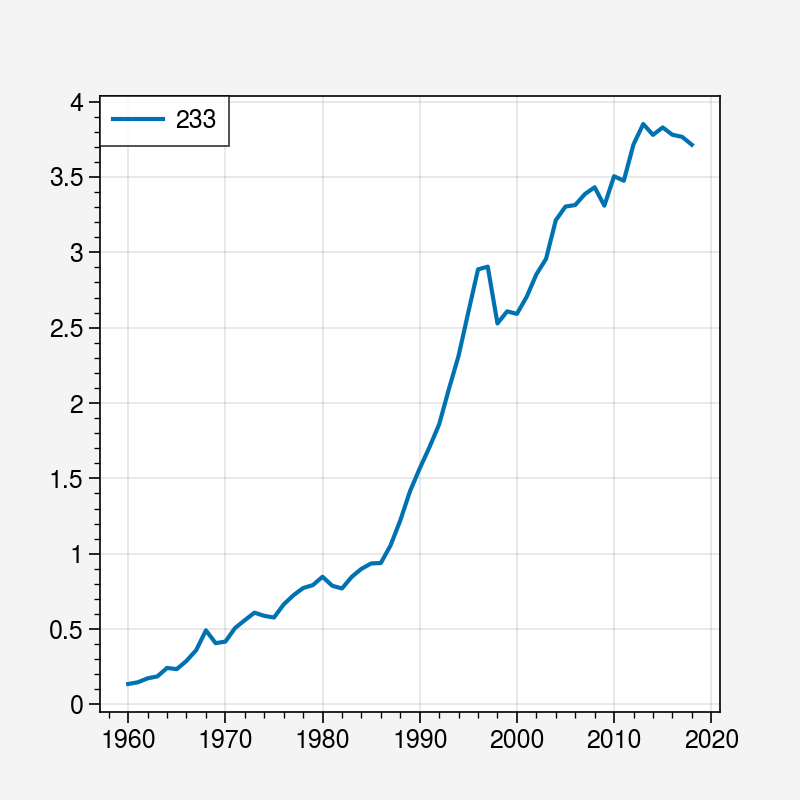

In [9]:
test = df[df['Country Name']=='Thailand'].iloc[:,4:].T
test.plot()
